<a href="https://colab.research.google.com/github/evarahma61/analisis-sentimen-Tolak_RUU_IKN/blob/main/Sentiment_analysis_using_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><b> Analisis Sentimen Menggunakan SVM

Langkah - langkah : 
Data preprocessing steps
1. Cleaning the text
2. Tokenization
3. Enrichment - POS tagging
4. Stopwords removal
5. Obtaining the stem words
6. Pelabelan Data menggunakan metode Lexicon (Textblob)
7. Split data training & data testing
8. Pembobotan : TF-IDF
9. SVM Model
10. Evaluasi hasil pengujian

<h3><b> Import Dataset

Mengimport data yang telah di crawling melalui twitter dengan menggunakan library python twint, dengan tagar #TolakRUU_IKN

In [ ]:
import pandas as pd
# Creating a pandas dataframe from reviews.txt file
data = pd.read_csv('18102011_EVA RAHMA INDRIYANI_A.csv')
data.head()


,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1448294529149259776,1448294529149259776,2021-10-13 14:28:18 UTC,2021-10-13,14:28:18,0,907415343299096577,latarterkemban4,LatarNanggroe,NaN,#tolakruu_ikn https://t.co/TSsynqbBFM,und,[],[],['https://pbs.twimg.com/media/FBlgDmcUYAQVlBx....,0,0,3,['tolakruu_ikn'],[],https://twitter.com/latarterkemban4/status/144...,False,NaN,1,https://pbs.twimg.com/media/FBlgDmcUYAQVlBx.jpg,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1447909667372367874,1447909667372367874,2021-10-12 12:59:00 UTC,2021-10-12,12:59:00,0,1273301834690473985,ratu_tagar,👑Rätû_TågªRحسن المرضية🛡,NaN,Jika sumber daya manusia di suatu negara berku...,in,[],[],[],0,0,2,['tolakruu_ikn'],[],https://twitter.com/Ratu_Tagar/status/14479096...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1446840579787087873,1446840579787087873,2021-10-09 14:10:49 UTC,2021-10-09,14:10:49,0,907415343299096577,latarterkemban4,LatarNanggroe,NaN,#TolakRUU_IKN https://t.co/inISfLLuRe,und,[],[],['https://pbs.twimg.com/media/FBQ1ylyUUAc8Bej....,0,0,2,['tolakruu_ikn'],[],https://twitter.com/latarterkemban4/status/144...,False,NaN,1,https://pbs.twimg.com/media/FBQ1ylyUUAc8Bej.jpg,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1446743096973086721,1446743096973086721,2021-10-09 07:43:28 UTC,2021-10-09,07:43:28,0,40423170,miyoels,miyoeL's,NaN,"Saya perhatiin, kalo kita googling tentang doa...",in,[],[],[],0,0,1,"['tolakruu_ikn', 'tolakruu_ikn']",[],https://twitter.com/miyoels/status/14467430969...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1446685463767498760,1399725334182912008,2021-10-09 03:54:27 UTC,2021-10-09,03:54:27,0,1101090936115716096,inyongbralink,inyong,NaN,@kusmayadi2409 @c1nt4_2l2 @wierboy @BunnyPosit...,in,[],[],[],0,0,0,['tolakruu_ikn'],[],https://twitter.com/inyongbralink/status/14466...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'kusmayadi2409', 'name': '🏹mi...",NaN,NaN,NaN,NaN


Drop kolom yang tidak diperlukan, kolom-kolom selain kolom tweet tidak dibutuhkan dalam analisis sentimen

In [ ]:
mydata = data.drop(['username','user_id','id','conversation_id','created_at','date','time','timezone',
                    'name','place','language','mentions','urls','photos','replies_count',
                    'retweets_count','likes_count','hashtags','cashtags','link','retweet',
                    'quote_url','video','thumbnail','near','geo','source','user_rt','retweet_id',
                    'reply_to','retweet_date','translate','trans_src','trans_dest','user_rt_id','username'], axis=1)
mydata.head()


,tweet
0,#tolakruu_ikn https://t.co/TSsynqbBFM
1,Jika sumber daya manusia di suatu negara berku...
2,#TolakRUU_IKN https://t.co/inISfLLuRe
3,"Saya perhatiin, kalo kita googling tentang doa..."
4,@kusmayadi2409 @c1nt4_2l2 @wierboy @BunnyPosit...


<h2><b> 1 : Cleaning Text

Cleaning merupakan step dimana data yang akan diolah harus dibersihkan terlebih dahulu. 

Data berupa tweets yang didapatkan dari twitter mengandung berbagai macam tipe informasi serta berbagai macam karakter spesial yang tidak diperlukan dalam proses analisis sentimen. Jika ditemukan data yang mengandung suatu link, maka akan dilakukan proses penghapusan URL. Selain itu, proses penghapusan juga dilakukan terhadap karakter spesial lainnya seperti hastag ataupun username dari suatu user (dituliskan @username)


In [ ]:
import re
# Define a function to clean the text
def clean(text):
 # Removes all special characters and numericals leaving the alphabets
 text = re.sub(r"http\S+", "", text) # menghilangkan URL gambar
 text = re.sub('@[^\s]+','',text) # menghilangkan mention username dalam tweets
 text = re.sub("@[A-Za-z0-9]+","",text) 
 text = re.sub('[^A-Za-z]+', ' ', text) #menghilangkan simbol dan karakter spesial yang bukan huruf/angka

 return text
# Cleaning the text in the review column
mydata['Cleaned Reviews'] = mydata['tweet'].apply(clean) #membuat kolom baru yang bernama 'Cleaned Reviews'
mydata

,tweet,Cleaned Reviews
0,#tolakruu_ikn https://t.co/TSsynqbBFM,tolakruu ikn
1,Jika sumber daya manusia di suatu negara berku...,Jika sumber daya manusia di suatu negara berku...
2,#TolakRUU_IKN https://t.co/inISfLLuRe,TolakRUU IKN
3,"Saya perhatiin, kalo kita googling tentang doa...",Saya perhatiin kalo kita googling tentang doa ...
4,@kusmayadi2409 @c1nt4_2l2 @wierboy @BunnyPosit...,Ttp kompak sesama oposisi TolakRUU IKN
...,...,...
309,@212ujee2A @DzauZie @RadjaDjawa @Raksa_I3ander...,Leres TolakRUU IKN TolakRUU IKN
310,Masyarakat Papua Bantah Tuduhan Kuasa Hukum Lu...,Masyarakat Papua Bantah Tuduhan Kuasa Hukum Lu...
311,@UtomoAdi23 @DzauZie @RadjaDjawa @Raksa_I3ande...,Mun dilembur ngaranna Bakiak Mun di kota slop...
312,@DzauZie Hmmmm... Kira kira istana ikut pindah...,Hmmmm Kira kira istana ikut pindah nggak yaa ...


<h2> <b> 2-4: Tokenization, POS tagging, stopwords removal


- Tokenization adalah proses pemecahan teks 
dari sebuah kalimat menjadi potongan-potongan 
kata 
- POS Tagging merupakan kata yang telah dilabelisasi kelas kata berdasarkan kamus besar bahasa Indonesia. Dalam 
proses POS tagger dilakukan dengan cara parsing, kemudian ditentukan kelas tiap kata dengan 
menggunakan bantuan kamus yang di buat sendiri berdasarkan Kamus Besar Bahasa Indonesia 
(KBBI) menggunakan metode Maximum Entropy. Proses POS tagging terbagi ke dalam tiga 
proses yaitu pemisahan setiap token dalam dokumen dengan pengecekan setiap kata dalam 
dokumen, mengidentifikasi setiap kata dalam dokumen dengan pemberian jenis kata, pengecekan 
kata yang belum teridentifikasi terhadap bentuk imbuhan dan akhiran sehingga diperoleh kata 
dasar. 
- Stopword removal merupakan proses 
penghapusan kata-kata yang dianggap kurang/tidak
memiliki makna untuk mempengaruhi sentimen. 
Kata-kata yang dimaksud seperti “yang”, “di”, 
“dan”, “pada”, dan sebagainya.



Natural Language Toolkit atau disingkat NLTK, adalah libray python untuk bekerja dengan permodelan teks. NLTK menyediakan tools yang baik mempersiapkan teks sebelum digunakan pada machine learning atau algoritma deep learning

In [ ]:
pip install nltk


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
  tags = pos_tag(word_tokenize(text))
  newlist = []
  for word, tag in tags:
    if word.lower() not in set(stopwords.words('english')):
      newlist.append(tuple([word, pos_dict.get(tag[0])]))
  return newlist
  
mydata['POS tagged'] = mydata['Cleaned Reviews'].apply(token_stop_pos)
mydata.head()
# mydata['POS tagged'][0]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


,tweet,Cleaned Reviews,POS tagged
0,#tolakruu_ikn https://t.co/TSsynqbBFM,tolakruu ikn,"[(tolakruu, n), (ikn, n)]"
1,Jika sumber daya manusia di suatu negara berku...,Jika sumber daya manusia di suatu negara berku...,"[(Jika, n), (sumber, n), (daya, n), (manusia, ..."
2,#TolakRUU_IKN https://t.co/inISfLLuRe,TolakRUU IKN,"[(TolakRUU, n), (IKN, n)]"
3,"Saya perhatiin, kalo kita googling tentang doa...",Saya perhatiin kalo kita googling tentang doa ...,"[(Saya, n), (perhatiin, n), (kalo, n), (kita, ..."
4,@kusmayadi2409 @c1nt4_2l2 @wierboy @BunnyPosit...,Ttp kompak sesama oposisi TolakRUU IKN,"[(Ttp, n), (kompak, v), (sesama, a), (oposisi,..."


<h2><b>5: Obtaining the stem words

<h3> <b> Lemmatization

Lemmatization adalah pengubahan kata-kata menjadi 
kata dasarnya

In [ ]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
 lemma_rew = " "
 for word, pos in pos_data:
  if not pos:
    lemma = word
    lemma_rew = lemma_rew + " " + lemma
  else:
    lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
    lemma_rew = lemma_rew + " " + lemma
 return lemma_rew

mydata['Lemma'] = mydata['POS tagged'].apply(lemmatize)
mydata.head()
# print(mydata['review'][239] + "\n" + mydata['Lemma'][239])

,tweet,Cleaned Reviews,POS tagged,Lemma
0,#tolakruu_ikn https://t.co/TSsynqbBFM,tolakruu ikn,"[(tolakruu, n), (ikn, n)]",tolakruu ikn
1,Jika sumber daya manusia di suatu negara berku...,Jika sumber daya manusia di suatu negara berku...,"[(Jika, n), (sumber, n), (daya, n), (manusia, ...",Jika sumber daya manusia di suatu negara ber...
2,#TolakRUU_IKN https://t.co/inISfLLuRe,TolakRUU IKN,"[(TolakRUU, n), (IKN, n)]",TolakRUU IKN
3,"Saya perhatiin, kalo kita googling tentang doa...",Saya perhatiin kalo kita googling tentang doa ...,"[(Saya, n), (perhatiin, n), (kalo, n), (kita, ...",Saya perhatiin kalo kita google tentang doa ...
4,@kusmayadi2409 @c1nt4_2l2 @wierboy @BunnyPosit...,Ttp kompak sesama oposisi TolakRUU IKN,"[(Ttp, n), (kompak, v), (sesama, a), (oposisi,...",Ttp kompak sesama oposisi TolakRUU IKN


In [ ]:
mydata[['tweet', 'Lemma']]

,tweet,Lemma
0,#tolakruu_ikn https://t.co/TSsynqbBFM,tolakruu ikn
1,Jika sumber daya manusia di suatu negara berku...,Jika sumber daya manusia di suatu negara ber...
2,#TolakRUU_IKN https://t.co/inISfLLuRe,TolakRUU IKN
3,"Saya perhatiin, kalo kita googling tentang doa...",Saya perhatiin kalo kita google tentang doa ...
4,@kusmayadi2409 @c1nt4_2l2 @wierboy @BunnyPosit...,Ttp kompak sesama oposisi TolakRUU IKN
...,...,...
309,@212ujee2A @DzauZie @RadjaDjawa @Raksa_I3ander...,Leres TolakRUU IKN TolakRUU IKN
310,Masyarakat Papua Bantah Tuduhan Kuasa Hukum Lu...,Masyarakat Papua Bantah Tuduhan Kuasa Hukum ...
311,@UtomoAdi23 @DzauZie @RadjaDjawa @Raksa_I3ande...,Mun dilembur ngaranna Bakiak Mun di kota slo...
312,@DzauZie Hmmmm... Kira kira istana ikut pindah...,Hmmmm Kira kira istana ikut pindah nggak yaa...


<h2><b> 6 : Labeling data using TextBlob

In [ ]:
pip install textblob

In [ ]:
from textblob import TextBlob
# function to calculate subjectivity
def getSubjectivity(review):
 return TextBlob(review).sentiment.subjectivity
# function to calculate polarity
def getPolarity(review):
 return TextBlob(review).sentiment.polarity
# function to analyze the reviews
def analysis(score):
 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 else:
  return 'Positive'


In [ ]:
fin_data = pd.DataFrame(mydata[['tweet', 'Lemma']])

In [ ]:
# fin_data['Subjectivity'] = fin_data['Lemma'].apply(getSubjectivity)
fin_data['Polarity'] = fin_data['Lemma'].apply(getPolarity)
fin_data['Analysis'] = fin_data['Polarity'].apply(analysis)
fin_data.head()

,tweet,Lemma,Polarity,Analysis
0,#tolakruu_ikn https://t.co/TSsynqbBFM,tolakruu ikn,0.0,Neutral
1,Jika sumber daya manusia di suatu negara berku...,Jika sumber daya manusia di suatu negara ber...,0.0,Neutral
2,#TolakRUU_IKN https://t.co/inISfLLuRe,TolakRUU IKN,0.0,Neutral
3,"Saya perhatiin, kalo kita googling tentang doa...",Saya perhatiin kalo kita google tentang doa ...,0.0,Neutral
4,@kusmayadi2409 @c1nt4_2l2 @wierboy @BunnyPosit...,Ttp kompak sesama oposisi TolakRUU IKN,0.0,Neutral


In [ ]:
tb_counts = fin_data.Analysis.value_counts()
tb_counts


Neutral     303
Positive      9
Negative      2
Name: Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7fb1bd0a4a10>,
 [Text(-1.093344965605629, 0.1208171601422004, 'Neutral'),
  Text(1.090708671178145, -0.1426695293915464, 'Positive'),
  Text(1.3497297337802774, -0.02701195567562109, 'Negative')],
 [Text(-0.596369981239434, 0.06590026916847294, '96.50'),
  Text(0.5949320024608064, -0.07781974330447984, '2.87'),
  Text(0.8498298323801745, -0.017007527647613277, '0.64')])

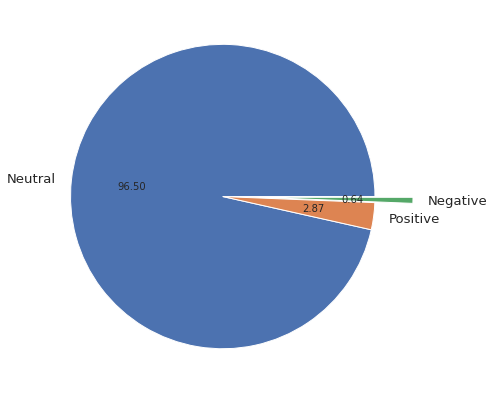

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
tb_count= fin_data.Analysis.value_counts()
plt.figure(figsize=(10, 7))
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%.2f')
#plt.legend()


<h3> <b>Analisis Using SVM

In [ ]:

from flask import Flask, render_template, url_for
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.metrics import accuracy_score

# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

<h2><b>7 : Splitting Data training and Data testing

In [ ]:
# Split into train and test data

train_X, test_X, train_Y, test_Y = model_selection.train_test_split(fin_data['Lemma'], fin_data['Analysis'], test_size = 0.1, random_state = 0)
# random_state = 0 menyatakan tidak ada pengacakan pada data yang di split yang artinya urutannya masih sama

In [ ]:

df_train90 = pd.DataFrame()
df_train90['Lemma'] = train_X
df_train90['Analysis'] = train_Y

df_test10 = pd.DataFrame()
df_test10['Lemma'] = test_X
df_test10['Analysis'] = test_Y

In [ ]:
df_train90

,Lemma,Analysis
164,TolakRUU IKN TolakRUU IKN Jumatan dulu kita,Neutral
240,Semoga PKS tetap bersama rakyat TolakRUU IKN,Neutral
124,marah terpuji dlm agama mksd anda agama apa ...,Neutral
230,Aamiinn TolakRUU IKN,Neutral
129,Dimasa depan Indonesia dengan Ibukota Negara...,Neutral
...,...,...
251,Begitu jelas dari awal pun sdh diusahakan di...,Neutral
192,Hadiah Hiburan Dan Acak Bayar Bonus Deposit ...,Neutral
117,TolakRUU IKN TolakRUU IKN,Neutral
47,Aamiinn TolakRUU IKN,Neutral


In [ ]:
df_test10

,Lemma,Analysis
65,Iyaa TolakRUU IKN TolakRUU IKN,Neutral
313,Hahaha Iya atuh TolakRUU IKN TolakRUU IKN,Positive
150,Lupa lupa ingat TolakRUU IKN TolakRUU IKN,Neutral
158,Pemimpin yang ruwet akan menghasilkan aturan...,Neutral
108,Pinjol itu salah satu bentuk ngeRIBAnget Tol...,Neutral
275,Siang kang U maaf telat hadir TolakRUU IKN T...,Neutral
135,Tancap Gass TolakRUU IKN TolakRUU IKN,Neutral
116,Aduh ada yg nyubit Smoga masih bisa TolakRUU...,Neutral
74,Bukan prioritas TolakRUU IKN TolakRUU IKN,Neutral
262,Gass poll broo TolakRUU IKN TolakRUU IKN,Neutral


In [ ]:
df_train90.to_csv(r"C:\Users\Asus\Documents\MATKUL ITTP\SMT 7\NLP\Tugas Analisis Sentimen SVM\df_train90.csv")
df_test10.to_csv(r"C:\Users\Asus\Documents\MATKUL ITTP\SMT 7\NLP\Tugas Analisis Sentimen SVM\df_test10.csv")

<h2><b>8 : Weighting (Pembobotan) menggunakan TF-IDF

In [ ]:
# TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect_9010 = TfidfVectorizer(max_features = 5000)
tfidf_vect_9010.fit(fin_data['Lemma'])
train_X_tfidf_9010 = tfidf_vect_9010.transform(df_train90['Lemma'])
test_X_tfidf_9010 = tfidf_vect_9010.transform(df_test10['Lemma'])

In [ ]:
tfidf_vect_9010

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=5000,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [ ]:

print(train_X_tfidf_9010)

  (0, 577)	0.2271088102214004
  (0, 280)	0.5306546217407047
  (0, 236)	0.5458176995937857
  (0, 213)	0.2271088102214004
  (0, 155)	0.5633221883389801
  (1, 577)	0.08555283476303378
  (1, 569)	0.48371233559377125
  (1, 513)	0.42441162938886356
  (1, 480)	0.3214083430011803
  (1, 467)	0.48371233559377125
  (1, 213)	0.08555283476303378
  (1, 76)	0.48371233559377125
  (2, 607)	0.12230227722373158
  (2, 591)	0.1512892127842175
  (2, 577)	0.03612770362068859
  (2, 566)	0.20426460381361564
  (2, 433)	0.1512892127842175
  (2, 372)	0.20426460381361564
  (2, 332)	0.20426460381361564
  (2, 309)	0.20426460381361564
  (2, 213)	0.03612770362068859
  (2, 185)	0.1512892127842175
  (2, 153)	0.20426460381361564
  (2, 146)	0.16882949525830662
  (2, 115)	0.13396333867605534
  :	:
  (278, 193)	0.18985499326952174
  (278, 188)	0.18985499326952174
  (278, 175)	0.1755099348533912
  (278, 125)	0.18985499326952174
  (278, 115)	0.13118809900299994
  (278, 110)	0.18985499326952174
  (278, 106)	0.18985499326952174

In [ ]:
print(test_X_tfidf_9010)

  (0, 577)	0.32970393334170706
  (0, 226)	0.8846415277828723
  (0, 213)	0.32970393334170706
  (1, 577)	0.18399808240354262
  (1, 225)	0.5574613323940469
  (1, 213)	0.18399808240354262
  (1, 190)	0.5574613323940469
  (1, 30)	0.5574613323940469
  (2, 577)	0.1688746092239318
  (2, 316)	0.8685448671054035
  (2, 218)	0.43427243355270173
  (2, 213)	0.1688746092239318
  (3, 607)	0.13933159311500398
  (3, 603)	0.2041776909531191
  (3, 596)	0.2327063184137809
  (3, 577)	0.04115810936086553
  (3, 490)	0.6981189552413427
  (3, 476)	0.2116817015264879
  (3, 442)	0.2327063184137809
  (3, 356)	0.2041776909531191
  (3, 215)	0.2116817015264879
  (3, 213)	0.04115810936086553
  (3, 115)	0.15261633569254418
  (3, 97)	0.2327063184137809
  (3, 32)	0.2116817015264879
  :	:
  (28, 118)	0.3763907826349258
  (28, 116)	0.1881953913174629
  (28, 115)	0.13004132892630677
  (28, 73)	0.1881953913174629
  (28, 48)	0.1881953913174629
  (28, 42)	0.1881953913174629
  (28, 39)	0.1881953913174629
  (28, 11)	0.18819539131

In [ ]:
print(train_X_tfidf_9010.shape)
print(test_X_tfidf_9010.shape)

(282, 608)
(32, 608)


In [ ]:

# You can use the below syntax to see the vocabulary that it has learned from the corpus
print(tfidf_vect_9010.vocabulary_)

{'tolakruu': 577, 'ikn': 213, 'jika': 235, 'sumber': 544, 'daya': 118, 'manusia': 330, 'di': 127, 'suatu': 541, 'negara': 391, 'berkualitas': 73, 'tinggi': 575, 'sudah': 542, 'dapat': 116, 'dipastikan': 140, 'bahwa': 42, 'pengelolaan': 447, 'semua': 514, 'alam': 11, 'yang': 603, 'ada': 3, 'akan': 10, 'maksimal': 325, 'dan': 115, 'menghasilkan': 356, 'kesejahteraan': 273, 'bagi': 39, 'bangsa': 48, 'saya': 501, 'perhatiin': 452, 'kalo': 246, 'kita': 280, 'google': 178, 'tentang': 557, 'doa': 147, 'atau': 29, 'ibadah': 208, 'agama': 6, 'islam': 222, 'seperti': 516, 'sholat': 522, 'shunnah': 523, 'puasa': 475, 'sejenisnya': 509, 'kenapa': 268, 'hasilnya': 196, 'banyak': 53, 'keluar': 264, 'dari': 117, 'situs': 532, 'medium': 340, 'sekuler': 510, 'ya': 600, 'media': 339, 'dakwah': 112, 'pada': 417, 'kemana': 265, 'kalopun': 247, 'ngga': 397, 'dihalaman': 132, 'pertama': 453, 'ttp': 581, 'kompak': 286, 'sesama': 518, 'oposisi': 415, 'thanks': 570, 'brader': 95, 'masuk': 335, 'dalam': 113, 'g

<h2><b>9 : Building Machine Learning Model (using SVM algorithm)

In [ ]:
# Proses Pelatihan

from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(train_X_tfidf_9010,train_Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

<h2><b>10 : Evaluation (pengujian)

In [ ]:
# Proses Pengujian

from sklearn.metrics import accuracy_score

predictions_SVM_9010 = model.predict(test_X_tfidf_9010)
test_prediction_9010 = pd.DataFrame()
test_prediction_9010['Sentiment'] = test_X
test_prediction_9010['Label'] = predictions_SVM_9010
SVM_accuracy_9010 = accuracy_score(predictions_SVM_9010, test_Y)*100
SVM_accuracy_9010 = round(SVM_accuracy_9010,1)

In [ ]:

test_prediction_9010

,Sentiment,Label
65,Iyaa TolakRUU IKN TolakRUU IKN,Neutral
313,Hahaha Iya atuh TolakRUU IKN TolakRUU IKN,Neutral
150,Lupa lupa ingat TolakRUU IKN TolakRUU IKN,Neutral
158,Pemimpin yang ruwet akan menghasilkan aturan...,Neutral
108,Pinjol itu salah satu bentuk ngeRIBAnget Tol...,Neutral
275,Siang kang U maaf telat hadir TolakRUU IKN T...,Neutral
135,Tancap Gass TolakRUU IKN TolakRUU IKN,Neutral
116,Aduh ada yg nyubit Smoga masih bisa TolakRUU...,Neutral
74,Bukan prioritas TolakRUU IKN TolakRUU IKN,Neutral
262,Gass poll broo TolakRUU IKN TolakRUU IKN,Neutral


In [ ]:
test_prediction_9010.to_csv(r"C:\Users\Asus\Documents\MATKUL ITTP\SMT 7\NLP\Tugas Analisis Sentimen SVM\test_prediction_9010.csv")

In [ ]:
SVM_accuracy_9010

96.9

In [ ]:
# Accuracy, Precision, Recall, f1-score

from sklearn.metrics import classification_report

print ("\nHere is the classification report:") 
print (classification_report(test_Y, predictions_SVM_9010))


Here is the classification report:
              precision    recall  f1-score   support

     Neutral       0.97      1.00      0.98        31
    Positive       0.00      0.00      0.00         1

    accuracy                           0.97        32
   macro avg       0.48      0.50      0.49        32
weighted avg       0.94      0.97      0.95        32



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


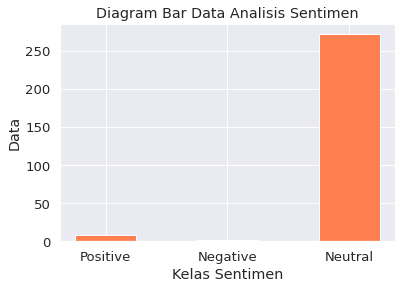

In [ ]:
#Bar plot for bipolar reviews for Train Set

labels = ['Positive','Negative', 'Neutral']
Category1 = [8, 2, 272]
plt.bar(labels, Category1, tick_label=labels, width=0.5, color=['coral', 'c'])
plt.xlabel('Kelas Sentimen')
plt.ylabel('Data')
plt.title('Diagram Bar Data Analisis Sentimen')
plt.savefig(r"C:\Users\Asus\Documents\MATKUL ITTP\SMT 7\NLP\Tugas Analisis Sentimen SVM\bar_data.png")
plt.show()